# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import dqn_agent
from collections import deque
import importlib
import time
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

RANDOM_SEED=42

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64", seed=RANDOM_SEED)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
ACTION_SIZE = brain.vector_action_space_size
print('Number of actions:', ACTION_SIZE)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
STATE_SIZE = len(state)
print('States have length:', STATE_SIZE)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          1.          0.          0.          0.78926337  0.          1.
  0.          0.          0.55464244  0.          1.          0.          0.
  0.42521358  0.          1.          0.          0.          0.56680632
  0.          1.          0.          0.          0.46538338  0.          1.
  0.          0.          0.51788217  0.          0.          1.          0.
  0.39806581  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(ACTION_SIZE)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
def dqn(n_episodes=2000, max_t=500, eps_start=1.0, eps_end=0.03, eps_decay=0.95, 
        scores_window_len=100, goal_score = 13, verbose=1):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        scores_window_len: a rolling window size for averaging the scores
        goal_score: the minimum average score required for a satisfactory model
        verbose: 0-No output, 1-Score output, 2-Score and Hyperparameter output
    """
    # create an agent
    agent = dqn_agent.Agent(state_size=STATE_SIZE, action_size=ACTION_SIZE, seed=RANDOM_SEED)
    
    scores = [] # list containing scores from each episode
    scores_window = deque(maxlen=scores_window_len) # last however many scores
    eps = eps_start # initialize epsilon
    
    # Print out the dqn_agent hyperparameters
    if verbose ==2:
        print('BUFFER_SIZE = ', dqn_agent.BUFFER_SIZE)
        print('BATCH_SIZE = ', dqn_agent.BATCH_SIZE)
        print('GAMMA = ', dqn_agent.GAMMA)
        print('TAU = ', dqn_agent.TAU)
        print('LR = ', dqn_agent.LR)
        print('UPDATE_EVERY = {}'.format(dqn_agent.UPDATE_EVERY))
        print('Epsilon Decay = {}'.format(eps_decay))
        print('Epsilon Min = {}\n'.format(eps_end))
        
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score) # save most recent score
        scores.append(score) # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if verbose >=1:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % scores_window_len == 0:
            if verbose >=1: 
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=goal_score:
            if verbose >=1:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                      .format(i_episode-scores_window_len, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

In [8]:
def generate_scores(n_episodes=2000, max_t=500, eps_start=1.0, eps_end=0.03, eps_decay=0.95, 
                    scores_window_len=100, goal_score = 13, verbose=1, plot=False):
    """ Generates scores using the agent.  
        Attempts to make hyperparameter tuning easier
        Updates for the changes in the dqn_agent.py file 
    """
    
    # reload library after modifying Hyperparameters
    importlib.reload(dqn_agent)

    # Generate Scores
    tic = time.time()
    scores = dqn(n_episodes=n_episodes, eps_end=eps_end, eps_decay=eps_decay,
                 scores_window_len=scores_window_len, goal_score=goal_score, verbose=verbose)
    toc = time.time()
    if verbose >=1:
        print("\nTime elapsed: {:.0f} seconds".format(toc-tic))

    # Plot Scores
    if plot == True:
        plot_scores(scores, rolling_window=scores_window_len)

    return scores

In [9]:
def plot_scores(scores, rolling_window=10):
    """ Plots the scores and a rolling average"""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean)
    plt.title('Scores')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    return None

BUFFER_SIZE =  100000
BATCH_SIZE =  64
GAMMA =  0.99
TAU =  0.01
LR =  0.0005
UPDATE_EVERY = 4
Epsilon Decay = 0.95
Epsilon Min = 0.01

Episode 100	Average Score: 7.77
Episode 200	Average Score: 11.98
Episode 300	Average Score: 12.67
Episode 326	Average Score: 13.00
Environment solved in 226 episodes!	Average Score: 13.00

Time elapsed: 251 seconds


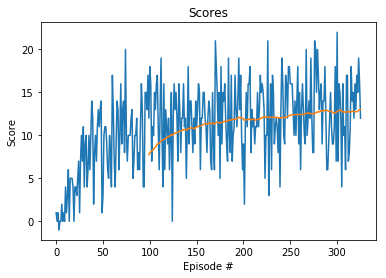

In [10]:
_ = generate_scores(n_episodes=600, max_t=500, eps_start=1.0, eps_end=0.01, eps_decay=0.95, 
                    scores_window_len=100, goal_score = 13, verbose=2, plot=True)

BUFFER_SIZE =  100000
BATCH_SIZE =  64
GAMMA =  0.99
TAU =  0.01
LR =  0.0005
UPDATE_EVERY = 4
Epsilon Decay = 0.95
Epsilon Min = 0.03

Episode 100	Average Score: 3.03
Episode 200	Average Score: 9.83
Episode 300	Average Score: 11.17
Episode 400	Average Score: 11.97
Episode 451	Average Score: 13.02
Environment solved in 351 episodes!	Average Score: 13.02

Time elapsed: 346 seconds


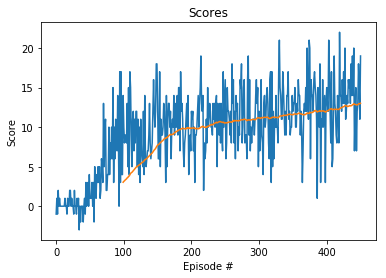

In [11]:
_ = generate_scores(n_episodes=600, max_t=500, eps_start=1.0, eps_end=0.03, eps_decay=0.95, 
                    scores_window_len=100, goal_score = 13, verbose=2, plot=True)

When finished, you may close the environment

In [12]:
#env.close()